In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [11.7,8.27]
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
subjects = ["C001","C002","C003","C004","C005","H001","H002","H004","H005"]
datasets = []
for subject in subjects:
    exec(subject +'= pd.read_csv(\'../data/combined/'+subject+'_average.csv\')')

C001["Control"]=1
C002["Control"]=1
C003["Control"]=1
C004["Control"]=1
C005["Control"]=1
H001["Control"]=0
H002["Control"]=0
H004["Control"]=0
H005["Control"]=0

    
for subject in subjects:
    exec(subject + '_lh = ' + subject + '['+ subject + '["Hemisphere"]=="lh"]')
    exec(subject + '_rh = ' + subject + '['+ subject + '["Hemisphere"]=="rh"]')

In [3]:
data = pd.concat([C001_lh,C002_lh,C003_lh,C004_rh,C005_lh,H001_lh,H002_lh,H004_rh,H005_lh], ignore_index=True)
data_damaged = pd.concat([H001_rh, H004_lh, H005_rh], ignore_index=True)
data_healthy_patients = pd.concat([H001_lh,H004_rh,H005_lh], ignore_index = True)
data = data[data["R^2"]>0.1] 
data_damaged = data_damaged[data_damaged["R^2"]>0.1]
data_healthy_patients = data_healthy_patients[data_healthy_patients["R^2"]>0.1]

### Combine locations

In [4]:
V3AB = []
V2 = []
V3 = []
hMT = []
for index, row in data.iterrows():
    if row.Location == "V3A" or row.Location == "V3B":
        V3AB.append(index)
    if row.Location == "V2v" or row.Location == "V2d":
        V2.append(index)
    if row.Location == "V3v" or row.Location == "V3d":
        V3.append(index)
    if row.Location == "TO2":
        hMT.append(index)

data.loc[V3AB, "Location"] = "V3AB"
data.loc[V2, "Location"] = "V2"
data.loc[V3, "Location"] = "V3"
data.loc[hMT, "Location"] = "hMT+"

V3AB = []
V2 = []
V3 = []
hMT = []
for index, row in data_damaged.iterrows():
    if row.Location == "V3A" or row.Location == "V3B":
        V3AB.append(index)
    if row.Location == "V2v" or row.Location == "V2d":
        V2.append(index)
    if row.Location == "V3v" or row.Location == "V3d":
        V3.append(index)
    if row.Location == "TO2":
        hMT.append(index)

data_damaged.loc[V3AB, "Location"] = "V3AB"
data_damaged.loc[V2, "Location"] = "V2"
data_damaged.loc[V3, "Location"] = "V3"
data_damaged.loc[hMT, "Location"] = "hMT+"

V3AB = []
V2 = []
V3 = []
hMT = []
for index, row in data_healthy_patients.iterrows():
    if row.Location == "V3A" or row.Location == "V3B":
        V3AB.append(index)
    if row.Location == "V2v" or row.Location == "V2d":
        V2.append(index)
    if row.Location == "V3v" or row.Location == "V3d":
        V3.append(index)
    if row.Location == "TO2":
        hMT.append(index)

data_healthy_patients.loc[V3AB, "Location"] = "V3AB"
data_healthy_patients.loc[V2, "Location"] = "V2"
data_healthy_patients.loc[V3, "Location"] = "V3"
data_healthy_patients.loc[hMT, "Location"] = "hMT+"

### Remove Nulls

In [5]:
null = []
for index, row in data.iterrows():
    if sum(row == 0)>5:
        null.append(index)

data = data.drop(null)
data = data.reset_index(drop=True)

null = []
for index, row in data_damaged.iterrows():
    if sum(row == 0)>5:
        null.append(index)

data_damaged = data_damaged.drop(null)
data_damaged = data_damaged.reset_index(drop=True)

null = []
for index, row in data_healthy_patients.iterrows():
    if sum(row == 0)>5:
        null.append(index)

data_healthy_patients = data_healthy_patients.drop(null)
data_healthy_patients = data_healthy_patients.reset_index(drop=True)

### Bins for Eccentricity, Means for Sigma

In [6]:
data["Eccentricity_bins"] = np.ceil(data.Eccentricity)
data_damaged["Eccentricity_bins"] = np.ceil(data_damaged.Eccentricity)
data_healthy_patients["Eccentricity_bins"] = np.ceil(data_healthy_patients.Eccentricity)

In [7]:
data_all = pd.DataFrame()
for s in data.Subject.unique():
    data1 = data[data.Subject == s]
    for loc in data1.Location.unique():
        data2 = data1[data1.Location == loc]
        data2["Sigma_mean"]=[np.mean(data2.Sigma[data2.Eccentricity_bins == x]) for x in data2.Eccentricity_bins]
        data_all = pd.concat([data_all, data2])
        
data = data_all

data_all = pd.DataFrame()
for s in data_damaged.Subject.unique():
    data1 = data_damaged[data_damaged.Subject == s]
    for loc in data1.Location.unique():
        data2 = data1[data1.Location == loc]
        data2["Sigma_mean"]=[np.mean(data2.Sigma[data2.Eccentricity_bins == x]) for x in data2.Eccentricity_bins]
        data_all = pd.concat([data_all, data2])
data_damaged = data_all

data_all = pd.DataFrame()
for s in data_healthy_patients.Subject.unique():
    data1 = data_healthy_patients[data_healthy_patients.Subject == s]
    for loc in data1.Location.unique():
        data2 = data1[data1.Location == loc]
        data2["Sigma_mean"]=[np.mean(data2.Sigma[data2.Eccentricity_bins == x]) for x in data2.Eccentricity_bins]
        data_all = pd.concat([data_all, data2])
data_healthy_patients = data_all

# Healthy Hemisphere
## pRF size 

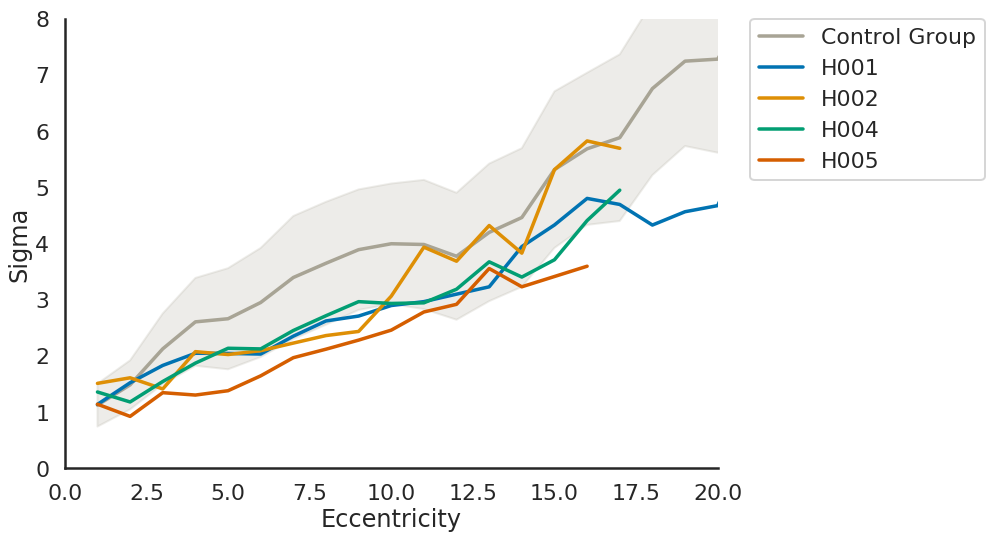

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sns.set_context('poster',rc={"lines.linewidth": 3.5})
lm = sns.lineplot(y='Sigma_mean', x='Eccentricity_bins', data=data[data.Control == 1], err_style="band",ci="sd", estimator="mean",color=sns.xkcd_rgb["greyish"])
sns.lineplot(y='Sigma_mean', x='Eccentricity_bins', data = data[data.Control == 0], hue='Subject', err_style="bars", legend= None,ci=None,palette=sns.color_palette('colorblind', n_colors=len(data[data.Control == 0].Subject.unique())))
lm.set(xlabel="Eccentricity", ylabel="Sigma", xlim=[0,20], ylim=[0,8]);
sns.despine()
plt.legend(["Control Group", "H001","H002","H004","H005"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); #, loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3);


#plt.savefig("../plots/prf_group",bbox_inches='tight')

### per visual area

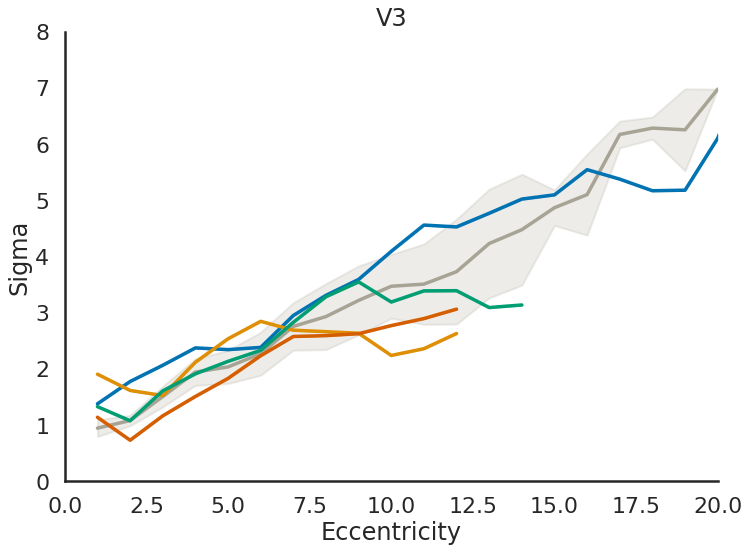

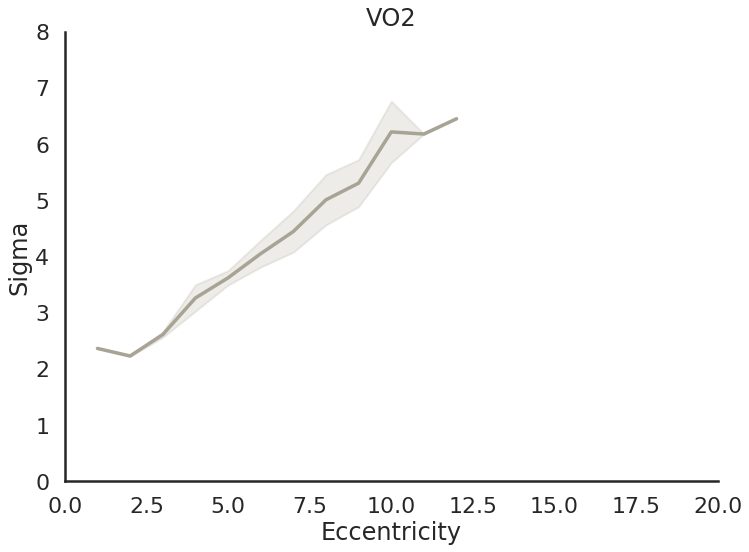

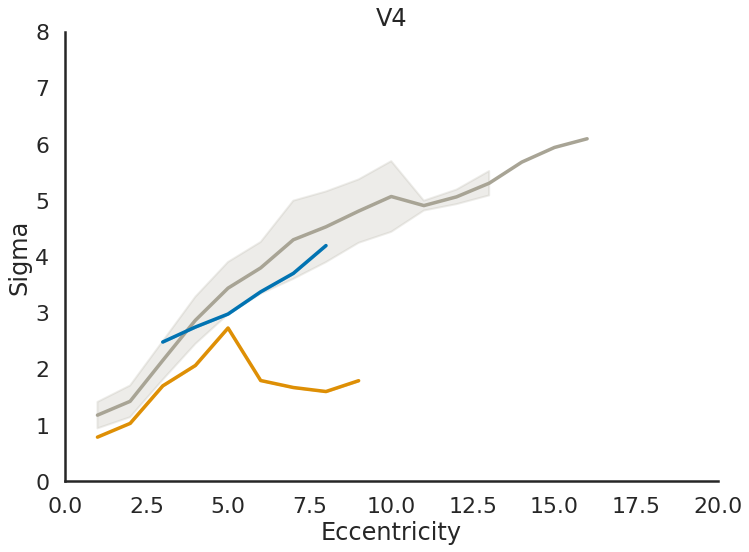

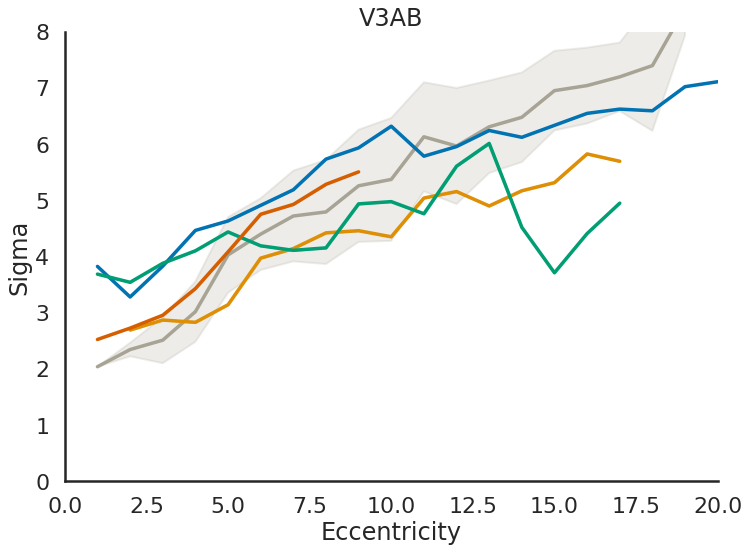

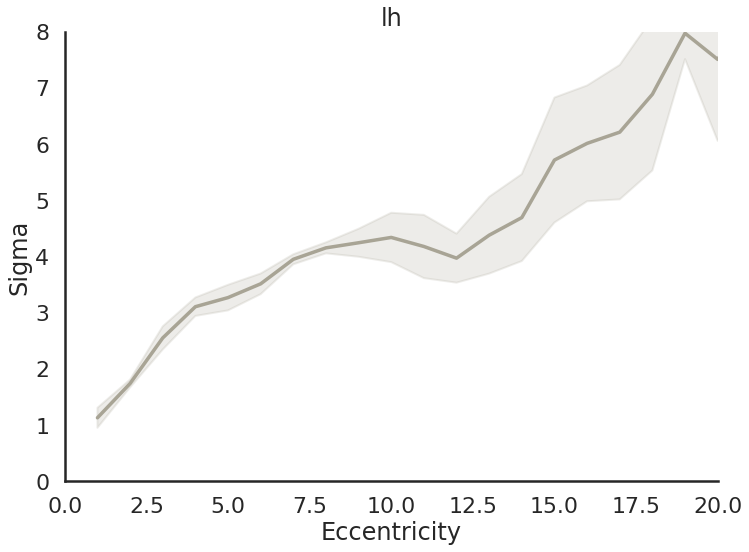

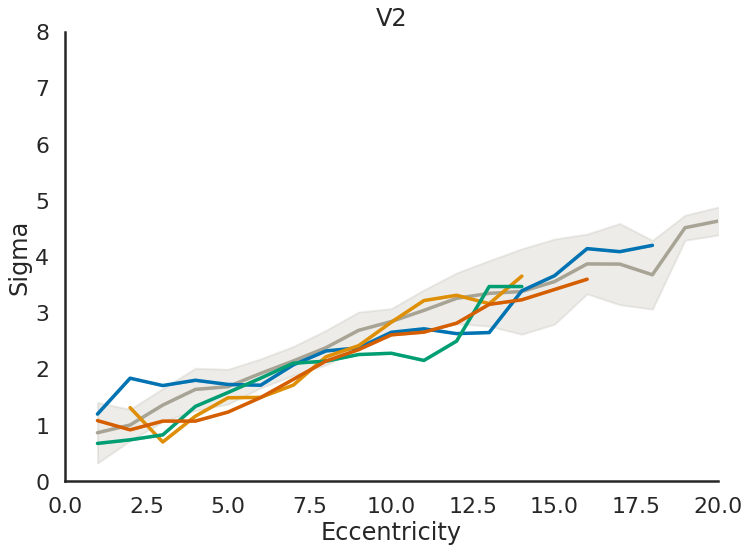

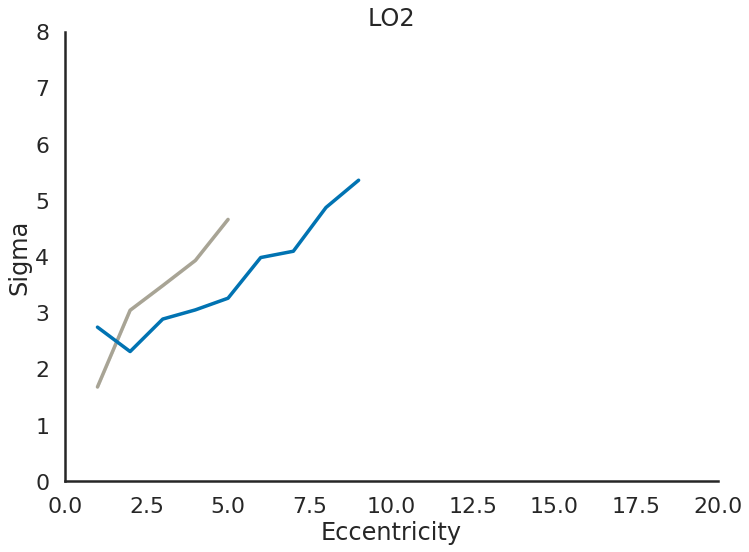

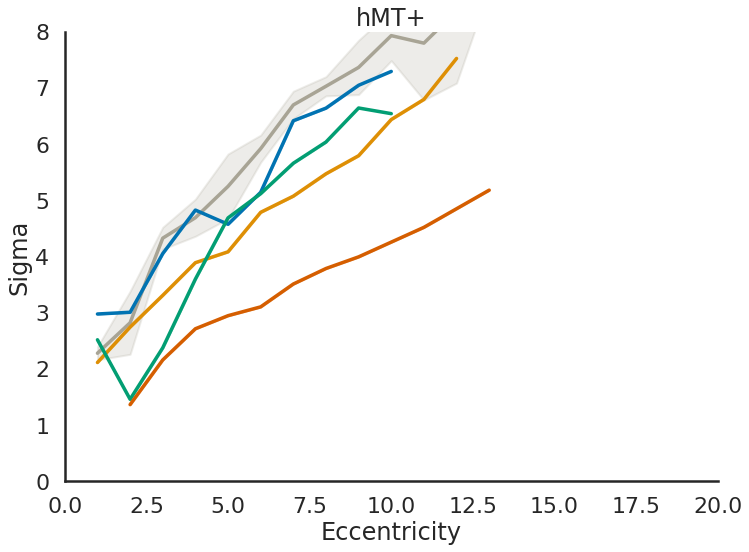

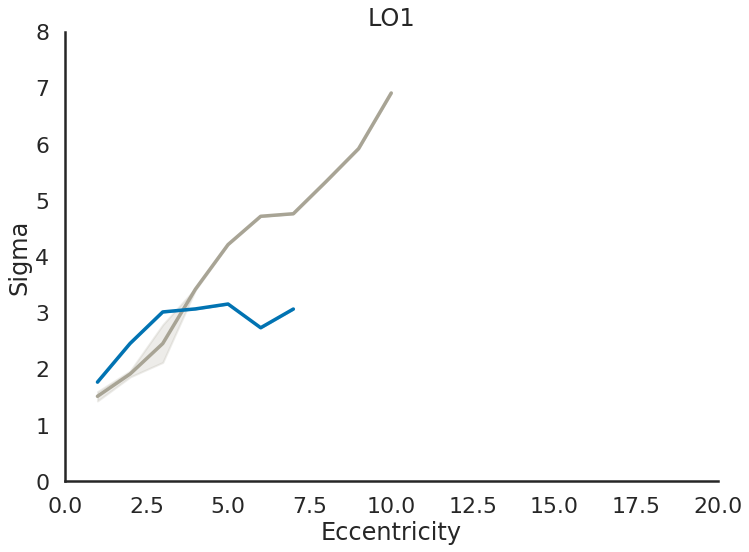

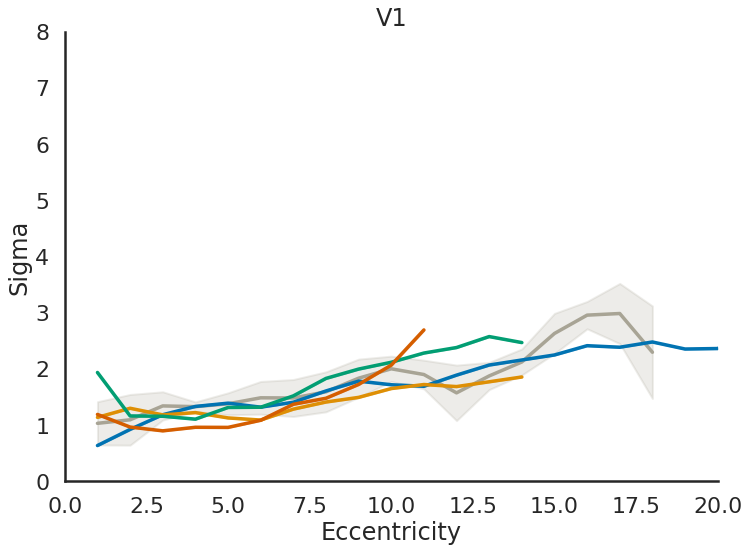

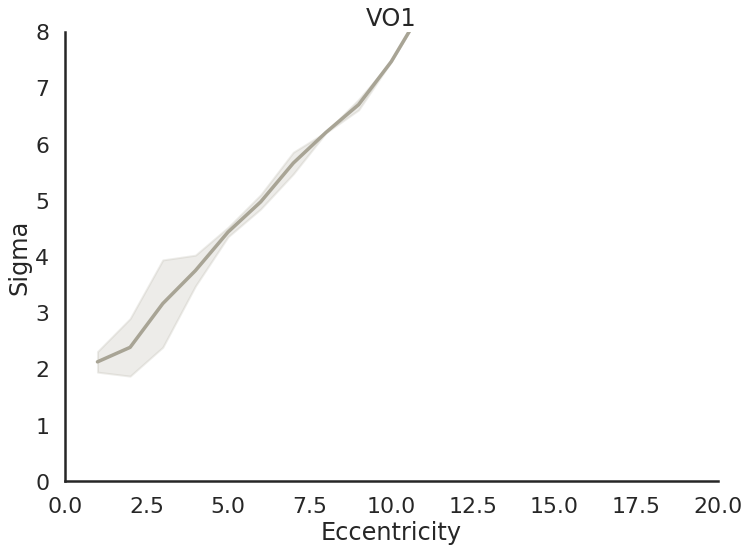

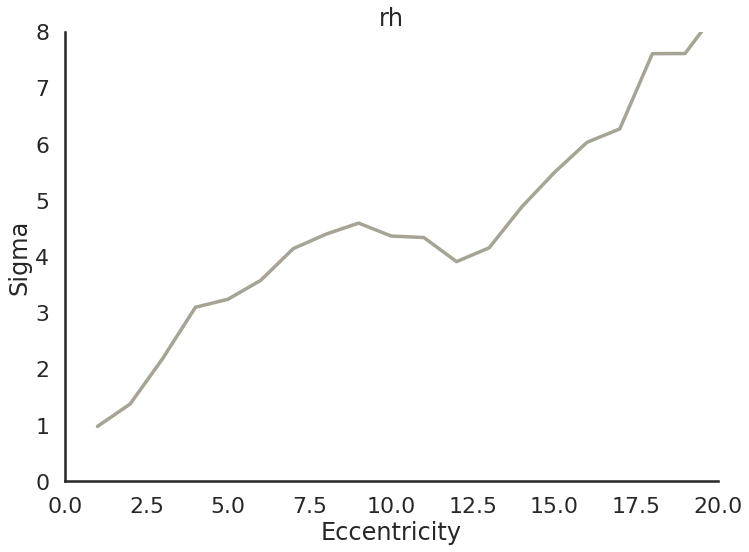

In [9]:
sns.set_context('poster',rc={"lines.linewidth": 3.5})

for x in data.Location.unique():
    plt.figure()
    data1 = data[data.Location == x]
    lm = sns.lineplot(y='Sigma_mean', x='Eccentricity_bins', data=data1[data1.Control==1], err_style="band",ci="sd", estimator="mean", legend=None, color=sns.xkcd_rgb["greyish"])
    sns.lineplot(y='Sigma_mean', x='Eccentricity_bins', data = data1[data1.Control == 0], hue='Subject',legend = None, palette=sns.color_palette('colorblind', desat=1,n_colors=len(data1[data1.Control == 0].Subject.unique())))
    lm.set(xlabel="Eccentricity", ylabel="Sigma", title=x, xlim=[0,20], ylim=[0,8]);
    sns.despine()
    #plt.legend(["Control Group", "H001","H002","H004","H005"])

    #if x == "V1" or x =="V2" or x=="V3" or x=="hMT+":
        #exec('plt.savefig("../plots/prf_'+x+'_size.jpg",bbox_inches="tight")')

# Damaged Hemisphere 
## pRF size

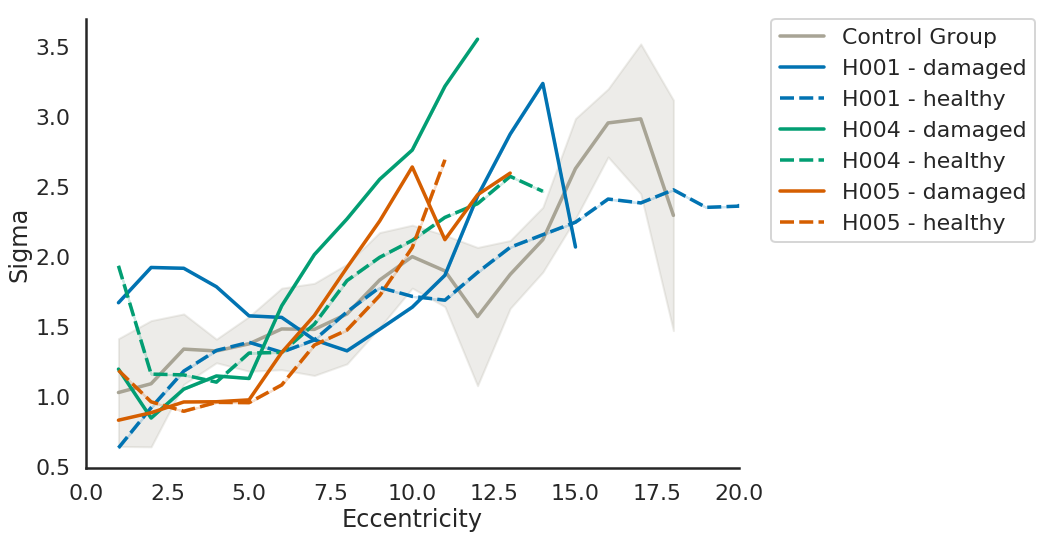

In [10]:
sns.set_context('poster',rc={"lines.linewidth": 3.5})

data_damaged_v1 = data_damaged[data_damaged.Location == "V1"]
data_damaged_v1["Damaged"] = True
data_healthy_v1 = data_healthy_patients[data_healthy_patients.Location =="V1"]
data_healthy_v1["Damaged"] = False
data_v1 = pd.concat([data_damaged_v1, data_healthy_v1])
data_control = data[data.Control==1]
lm = sns.lineplot(y='Sigma_mean', x='Eccentricity_bins', data=data_control[data_control.Location=='V1'], err_style="band",ci="sd", estimator="mean", legend=None, color=sns.xkcd_rgb["greyish"])
lm = sns.lineplot(y='Sigma_mean', x='Eccentricity_bins', data = data_v1[data_v1.Control == 0], hue='Subject', style='Damaged', style_order=[True, False], legend=None, palette=[sns.color_palette('colorblind', desat=1)[0], sns.color_palette('colorblind', desat=1)[2], sns.color_palette('colorblind', desat=1)[3]])
lm.set(xlabel="Eccentricity", ylabel="Sigma", xlim=[0,20]);
sns.despine()
plt.legend(["Control Group", "H001 - damaged", "H001 - healthy","H004 - damaged", "H004 - healthy","H005 - damaged", "H005 - healthy"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#plt.savefig("../plots/prf_damaged_v1.jpg",bbox_inches='tight')

### H001

In [11]:
x = data_v1[data_v1.Subject =="H001"]
x_d = x[x.Damaged == True]
x_h = x[x.Damaged == False]
for y in sorted(x_d.Eccentricity_bins.unique()):
    x_dy = x_d[x_d.Eccentricity_bins == y]
    x_hy = x_h[x_h.Eccentricity_bins == y]
    stat, p = ttest_ind(x_dy.Sigma, x_hy.Sigma)
    print(y, stat , p, p<0.05)

1.0 9.976552253342556 1.833454093095552e-20 True
2.0 17.658829758029864 2.5218144643513883e-56 True
3.0 10.9665447738551 6.942498615484424e-26 True
4.0 6.306790917705167 6.00304343233512e-10 True
5.0 2.6495036060068315 0.008344745648933964 True
6.0 4.10772125484316 4.7135390199683486e-05 True
7.0 0.007349166931765426 0.9941403709153428 False
8.0 -6.390237920511379 5.144379570742847e-10 True
9.0 -6.540978920529475 2.5209739173188386e-10 True
10.0 -1.2812321833685374 0.20154557093529019 False
11.0 2.459191203867409 0.014839268734268114 True
12.0 6.637071837396622 1.481833424108073e-09 True
13.0 4.501066766337683 5.7154252861345654e-05 True
14.0 4.26112047251041 0.00016727295913806 True
15.0 -0.49272507722049447 0.6293412005556579 False


### H004

In [12]:
x = data_v1[data_v1.Subject =="H005"]
x_d = x[x.Damaged == True]
x_h = x[x.Damaged == False]
for y in sorted(x_d.Eccentricity_bins.unique()):
    x_dy = x_d[x_d.Eccentricity_bins == y]
    x_hy = x_h[x_h.Eccentricity_bins == y]
    stat, p = ttest_ind(x_dy.Sigma, x_hy.Sigma)
    print(y, stat , p, p<0.05)

1.0 -8.597856613161907 7.732315490580057e-16 True
2.0 -2.255144476145472 0.0244808542332536 True
3.0 1.6094871385134584 0.10806351711311864 False
4.0 0.08818073580915463 0.9297782892705035 False
5.0 0.42606740799671655 0.6702699552936272 False
6.0 3.7573155841646484 0.00020970167735306978 True
7.0 2.1492962616604174 0.03286904916876162 True
8.0 4.492250788320982 1.272621940017349e-05 True
9.0 4.974382201803499 1.8884378273401704e-06 True
10.0 2.536201746789954 0.01582333570243086 True
11.0 -2.7678615977956977 0.00930287930070977 True
12.0 nan nan False
13.0 nan nan False


### H005

In [13]:
x = data_v1[data_v1.Subject =="H005"]
x_d = x[x.Damaged == True]
x_h = x[x.Damaged == False]
for y in sorted(x_d.Eccentricity_bins.unique()):
    x_dy = x_d[x_d.Eccentricity_bins == y]
    x_hy = x_h[x_h.Eccentricity_bins == y]
    stat, p = ttest_ind(x_dy.Sigma, x_hy.Sigma)
    print(y, stat , p, p<0.05)

1.0 -8.597856613161907 7.732315490580057e-16 True
2.0 -2.255144476145472 0.0244808542332536 True
3.0 1.6094871385134584 0.10806351711311864 False
4.0 0.08818073580915463 0.9297782892705035 False
5.0 0.42606740799671655 0.6702699552936272 False
6.0 3.7573155841646484 0.00020970167735306978 True
7.0 2.1492962616604174 0.03286904916876162 True
8.0 4.492250788320982 1.272621940017349e-05 True
9.0 4.974382201803499 1.8884378273401704e-06 True
10.0 2.536201746789954 0.01582333570243086 True
11.0 -2.7678615977956977 0.00930287930070977 True
12.0 nan nan False
13.0 nan nan False
